In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
data = pd.read_csv("california_house_prices.csv")
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [25]:
data.dropna(inplace = True)

In [26]:
# from sklearn.model_selection import train_test_split
# X = data.drop(['median_house_value'], axis = 1)
# Y = data['median_house_value']
# train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

In [27]:
# train_data = train_x.join(train_y)
# train_data.head()
train_data = data # The split will be in model file 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

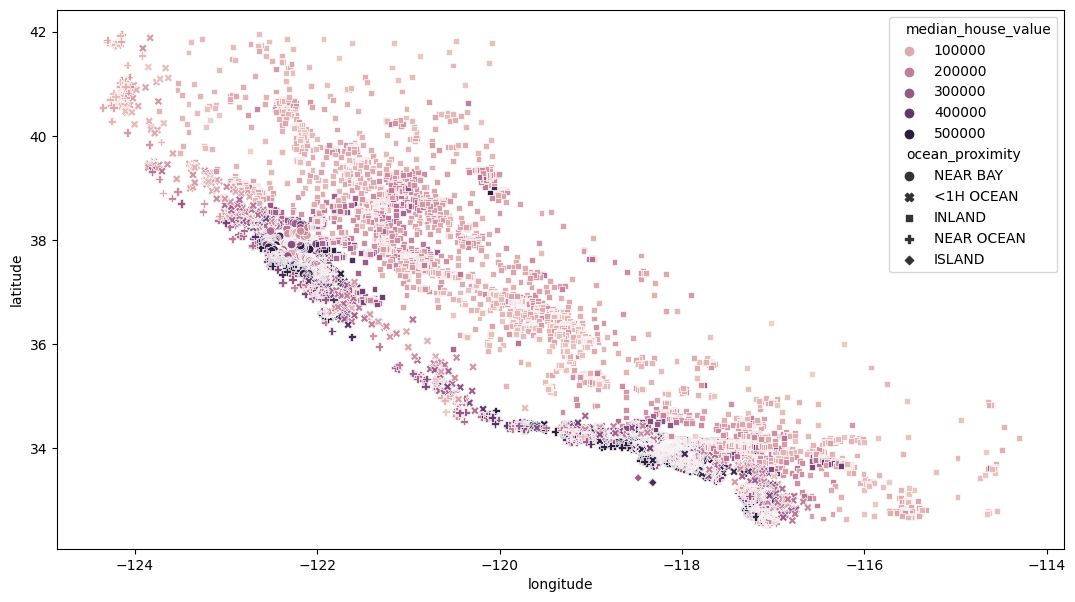

In [29]:
plt.figure(figsize=(13, 7))
sns.scatterplot(x='longitude', y='latitude',data=train_data, hue='median_house_value', style="ocean_proximity")

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

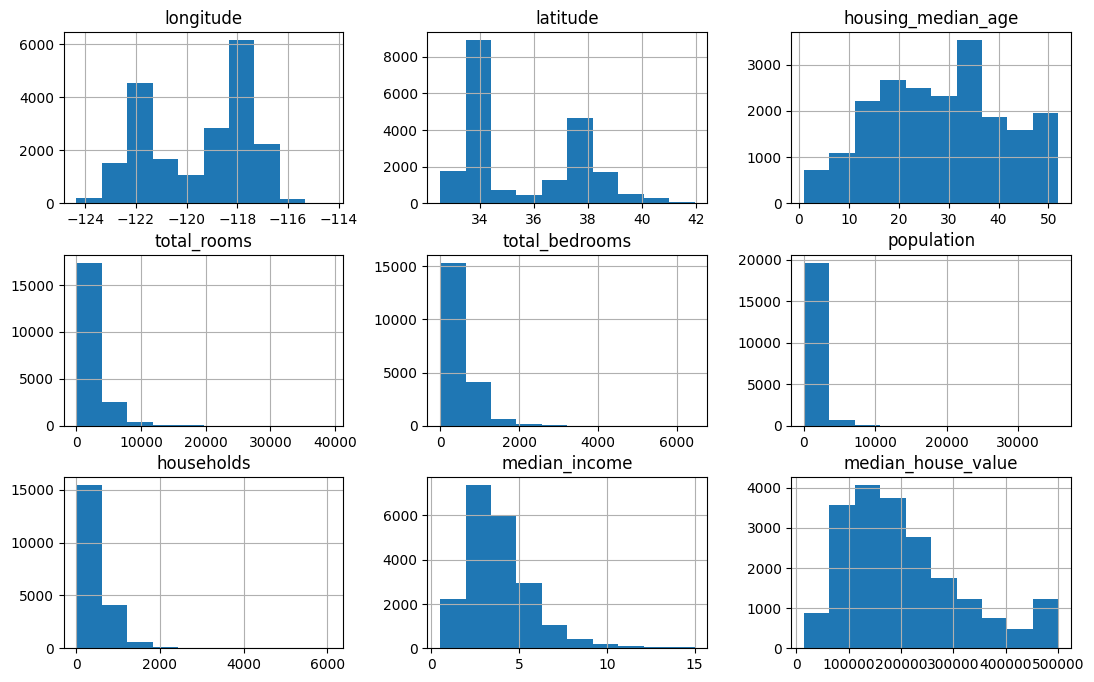

In [30]:
train_data.hist(figsize=(13, 8))

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 2.2+ MB


In [32]:
train_data['total_rooms'] = train_data['total_rooms'] ** 0.33
train_data['households'] = np.sqrt(train_data['households'])
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'])
train_data['population'] = np.log(train_data['population'] + 10)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

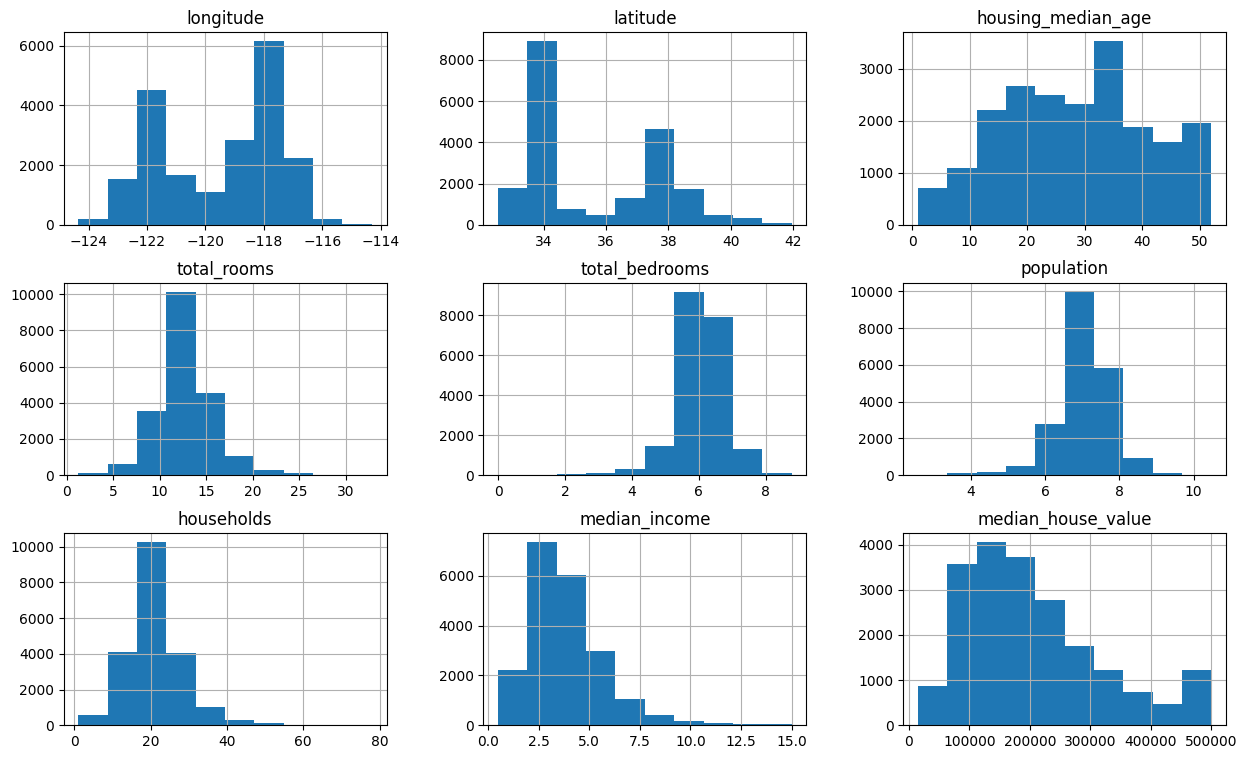

In [33]:
train_data.hist(figsize=(15, 9))

<AxesSubplot: >

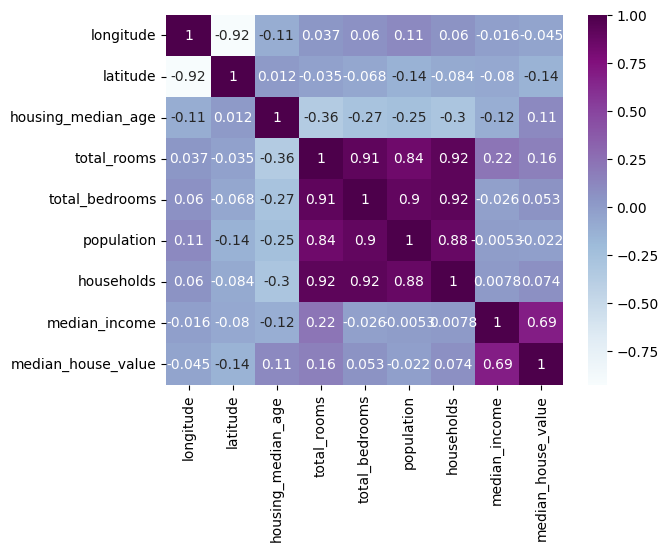

In [34]:
sns.heatmap(train_data.corr(), annot=True, cmap='BuPu')

In [35]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,9.368699,4.859812,5.805135,11.224972,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,18.659288,7.008505,7.787797,33.734256,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,11.089755,5.247024,6.226537,13.304135,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,10.585367,5.459586,6.342121,14.798649,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,11.475137,5.634790,6.354370,16.093477,3.8462,342200,0,0,0,1,0


<AxesSubplot: >

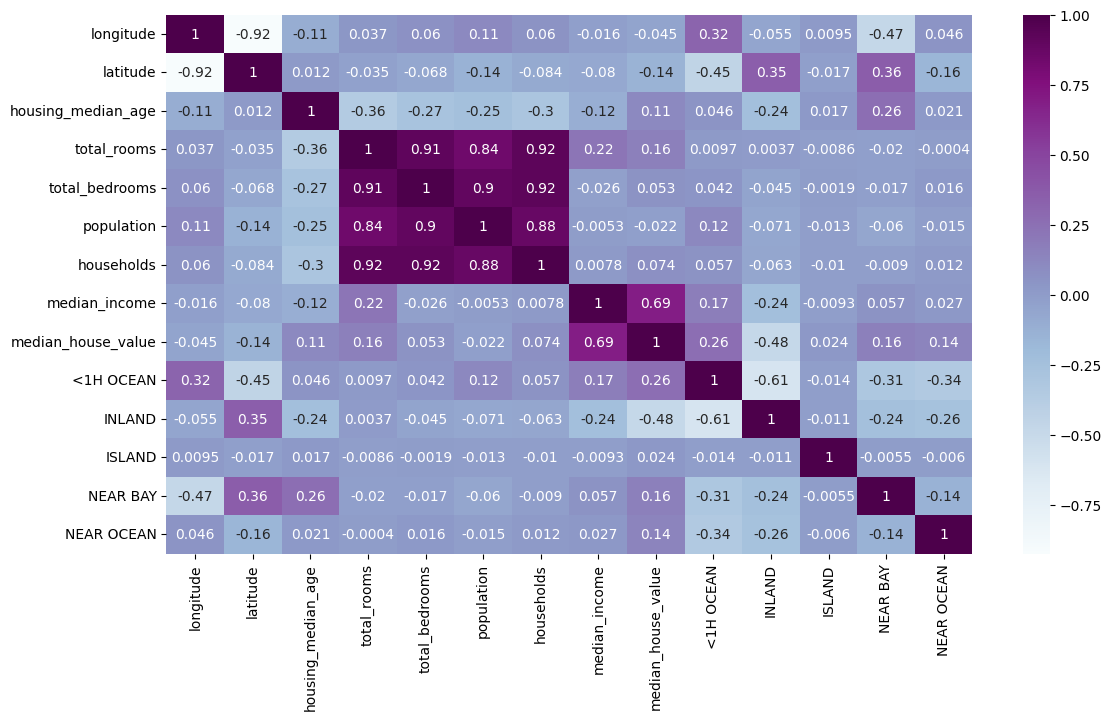

In [37]:
plt.figure(figsize=(13, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='BuPu')

In [38]:
train_data['household_per_room'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot: >

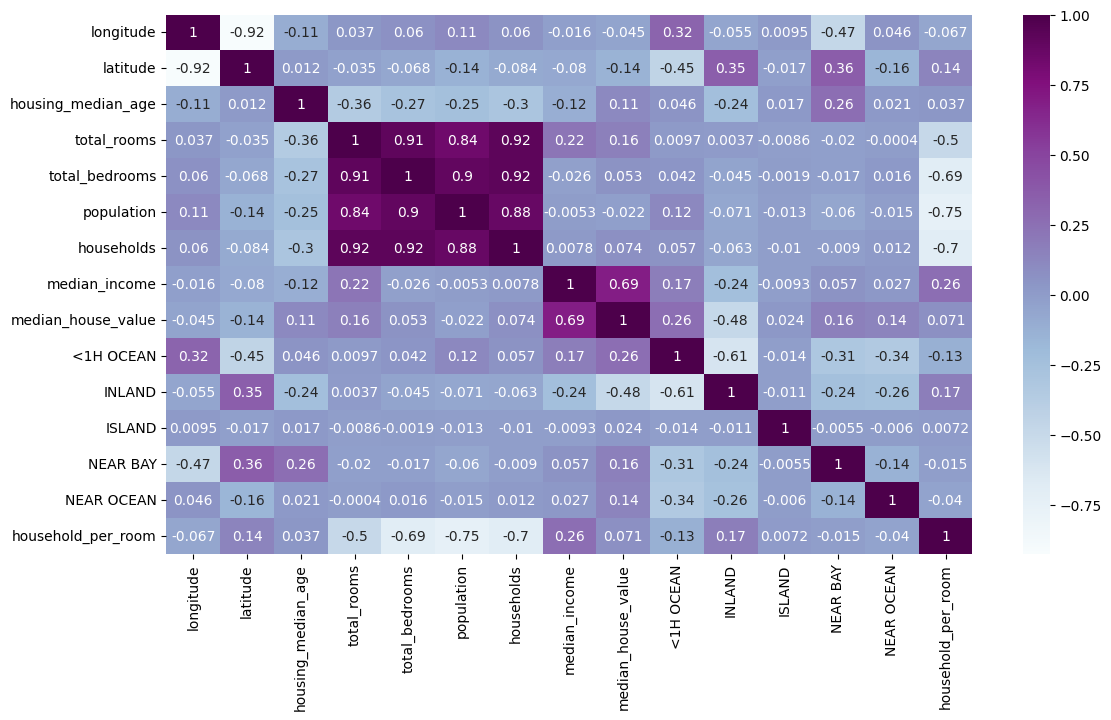

In [39]:
plt.figure(figsize=(13, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='BuPu')

In [40]:
train_data.to_csv('feature_engineered_data.csv', index=False)